In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "../../results/"
cnn_path = path + "cnn/"
weat_path = path + "xweat/"
#file = "task1_ft.txt"
#embedding = "ft_Unmod"
#name = "Task1"

In [3]:
def read_HatEval_results(path, file, name):

    data = list(map(
                    lambda x: x.strip().lower().split(),
                    open(path+file,"r", encoding="utf8").readlines()
                   ))

    results = {}

    for item in data:
        key = name + "_" + item[0][:-1]
        results[key] = item[1]
    
    return results

In [4]:
def read_HatEval_results_B(path, file, name):

    data = list(map(
                    lambda x: x.strip().lower().split(),
                    open(path+file,"r", encoding="utf8").readlines()
                   ))

    results = {}

    network = ""
    
    for i,item in enumerate(data):
        if i%5==0:
            network = item[0]
            continue
        key = name + "_" + network + "_" + item[0][:-1]
        results[key] = item[1]
    
    return results

In [10]:
def cnn1_results(embed, path, previous_data=None):
    if previous_data is None:
        exp_results = {}
    else:
        exp_results = previous_data
    for test in [None, 1,2,6,7,8,9]:
        if test is not None:
            mods = ["more", "less"]
        else:
            mods = [""]
        for mod in mods:
            task = "1"
            n =  "Task" + task
            for group in ["","g1","g2"]:
                name = n
                file = "task" + task + "_" + embed
                if test is not None:
                    file += "_t" + str(test) + "_" + mod
                if group != "":
                    file += "_" + group
                file += ".txt"
                #print(file)
                if test is None:
                    embedding = embed + "_Unmod"
                else:
                    embedding = embed + "_Test" + str(test) + "_" + mod
                if group != "":
                    name += "_" + group
                results = read_HatEval_results(path,file,name)
                if embedding not in exp_results.keys():
                    exp_results[embedding] = {}
                for key in results:
                    exp_results[embedding][key] = results[key]
            
            key = n+"_EqOpp"
            exp_results[embedding][key] = str(float(exp_results[embedding]["Task1_g1_recall"]) - float(exp_results[embedding]["Task1_g2_recall"])) 
            key = n+"_DiffPr"
            exp_results[embedding][key] = str(float(exp_results[embedding]["Task1_g1_precision"]) - float(exp_results[embedding]["Task1_g2_precision"])) 

    return exp_results

In [77]:
def cnn2_results(embed, path, previous_data=None):
    if previous_data is None:
        exp_results = {}
    else:
        exp_results = previous_data
    for test in [None, 1,2,6,7,8,9]:
        if test is not None:
            mods = ["more", "less"]
        else:
            mods = [""]
        for mod in mods:
            task = "2"
            n =  "Task" + task
            for group in ["","g1","g2"]:
                file = "task" + task + "_" + embed
                if test is not None:
                    file += "_t" + str(test) + "_" + mod
                if group != "":
                    file += "_" + group
                file += ".txt"
                #print(file)
                if test is None:
                    embedding = embed + "_Unmod"
                else:
                    embedding = embed + "_Test" + str(test) + "_" + mod
                name = n
                if group != "":
                    name += "_" + group
                results = read_HatEval_results_B(path,file,name)
                if embedding not in exp_results.keys():
                    exp_results[embedding] = {}
                for key in results:
                    exp_results[embedding][key] = results[key]
               
            EO = 0
            DP = 0
            for label in ["hs","tr","ag"]:
                key = n+"_"+label+"_EqOpp"
                exp_results[embedding][key] = str(float(exp_results[embedding]["Task2_g1_"+label+"_recall"]) - float(exp_results[embedding]["Task2_g2_"+label+"_recall"])) 
                EO += float(exp_results[embedding][key])
                key = n+"_"+label+"_DiffPr"
                exp_results[embedding][key] = str(float(exp_results[embedding]["Task2_g1_"+label+"_precision"]) - float(exp_results[embedding]["Task2_g2_"+label+"_precision"])) 
                DP += float(exp_results[embedding][key])
                
            exp_results[embedding][n+"_EqOpp"] = EO / 3
            exp_results[embedding][n+"_DiffPr"] = DP / 3
            

    return exp_results

In [7]:
def read_weat_results(path, file, name):

    data = list(map(
                        lambda x: x.strip().lower().split(),
                        open(path+file,"r", encoding="utf8").readlines()
                       ))
    
    results = {
               name+"_WeatStatistic": float(data[1][1][1:-1]),
               name+"_EffectSize":    float(data[1][2][:-1]),
               name+"_pValue":        float(data[1][3][:-1]),
              }
    
    return results

In [8]:
def weat_results(embed, path, previous_data=None):
    
    if previous_data is None:
        exp_results = {}
    else:
        exp_results = previous_data
        
    for test_mod in [None, 1,2,6,7,8,9]:
        if test_mod is not None:
            mods = ["more", "less"]
        else:
            mods = [""]
        for mod in mods:
            for curr_test in [1,2,6,7,8,9]:
                
                file = embed
                if test_mod is not None:
                    file += "_t" + str(test_mod) + "_" + mod
                file += "_test" + str(curr_test) + "_cased.res"
                
                if test_mod is None:
                    embedding = embed + "_Unmod"
                else:
                    embedding = embed + "_Test" + str(test_mod) + "_" + mod
                
                name = "Test" + str(curr_test)
                
                results = read_weat_results(path,file,name)
                if embedding not in exp_results.keys():
                    exp_results[embedding] = {}
                for key in results:
                    exp_results[embedding][key] = results[key]

    return exp_results
              

In [79]:
for embed in ["ft", "w2v"]:
    results_path = path+"csv/"+embed+"_"
    results = weat_results(embed,weat_path,None)
    results = cnn1_results(embed,cnn_path,results)
    results = cnn2_results(embed,cnn_path,results)
    df = pd.DataFrame(results, dtype=float).transpose()
    df.to_csv(results_path+"results.csv")
    cols = [col for col in df.columns if (("Size" in col) or ("f1" in col) or ("_EqOpp" in col) or ("_DiffPr" in col) or ("emr" in col))]
    concise = df[cols]
    concise.to_csv(results_path+"concise.csv")
    corr = concise.corr(method="spearman")
    corr.to_csv(results_path+"correlations.csv")
    

#ft_results.to_csv(path + "csv/" + "ft")

PermissionError: [Errno 13] Permission denied: '../../results/csv/ft_results.csv'

In [39]:
import matplotlib
import matplotlib.pyplot as plt

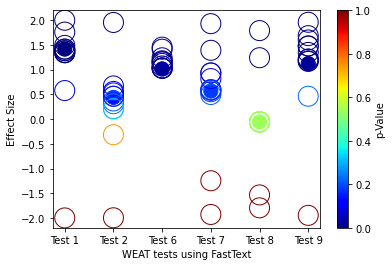

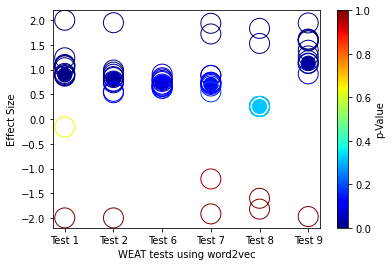

In [68]:
for embed in ["ft", "w2v"]:
    results_path = path+"csv/"+embed+"_"
    results = weat_results(embed,weat_path,None)
    
    WEAT = []
    Y = []
    P = []
    
    x = []
    y = []
    p = []
    
    XTICKS = ["Test "+str(i) for i in [1,2,6,7,8,9]]
    for a,embedding in enumerate(results):
        for j,i in enumerate([1,2,6,7,8,9]):
            key = "Test" + str(i) + "_EffectSize"
            if a!=0:
                WEAT.append(results[embedding][key])
            else:
                x.append(results[embedding][key])
            key = "Test" + str(i) + "_pValue"
            if a!=0:
                P.append(results[embedding][key])
                Y.append(j)
            else:
                p.append(results[embedding][key])
                y.append(j)
            
            
    cmap = plt.cm.jet
    plt.scatter(y,x,facecolors=cmap(p),s=200)
    plt.scatter(Y[::-1],WEAT[::-1],facecolors='none',edgecolors=cmap(P[::-1]),s=400)
    
    sm = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap))
    sm.ax.set_ylabel("p-Value")
    
    embedding = "FastText" if embed=="ft" else "word2vec"
    plt.xticks(range(6),XTICKS)
    plt.xlabel("WEAT tests using "+embedding)
    plt.ylabel("Effect Size")
    
    plt.savefig(embed + "_WEAT.png", dpi=300)
    plt.show()